In [1]:
from IPython.display import display, HTML
display(HTML("<style>div.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import tensorflow as tf                              # tensorflow 기본 import
from tensorflow.keras.models import Sequential       # model box 구성
from tensorflow.keras.utils  import plot_model       # model 시각화
from tensorflow.keras.layers import Flatten, Dense, Input  # model 안의 input layer와
                                                      # output layer를 구성
from tensorflow.keras.optimizers import SGD          # 알고리즘 담당
from sklearn.model_selection import train_test_split # train Data, Test Data 분리
from sklearn.preprocessing import MinMaxScaler       # 데이터 정규화
                                                      # 컴퓨터가 큰숫자를 작은숫자로 변경
                                                      # 0~1사이 실수 값으로 변경

In [5]:
import pandas as pd

# Raw Data Loading
df = pd.read_csv('../data/train.csv')

In [6]:
# x 데이터와 y 데이터를 분리해야 해요!
# 픽셀 데이터와 레이블 데이터를 분리해야 해요!
# 독립변수와 종속변수를 분리해야 해요!
x_data = df.drop('label', axis=1, inplace=False)  # 2차원 형태의 pixel 데이터
y_data = df['label']   # 1차원

In [7]:
# 픽셀데이터를 정규화 (0~1사이의 실수로 변환)
scaler = MinMaxScaler()
scaler.fit(x_data)   # scaler를 완성시키고
norm_x_data = scaler.transform(x_data)  # scaler를 통해서 실제로 값을 변환

In [8]:
# 데이터의 분할(학습용 데이터와 평가용 데이터로 분할)
# 분할 비율은 일반적으로 7:3, 8:2 정도로 분할해요!
# 현재 우리의 x_data => norm_x_data
# 현재 우리의 y_data => y_data
train_norm_x_data, test_norm_x_data, train_y_data, test_y_data = \
train_test_split(norm_x_data,
                 y_data,
                 test_size=0.3)

In [9]:
# CNN Model 구현
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()       # model Box 정의

model.add(Input(shape=(28, 28, 1)))  # 입력 정의
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation="relu"))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation="relu"))

# Fully Connection Layer(DNN)의 Input layer

model.add(Flatten())    # 전체 데이터를 4차원에서 2차원으로 변경

# Hidden Layer
model.add(Dense(units=256,
               activation="relu"))

# Output Layer
model.add(Dense(units=10,
             activation="softmax"))

In [10]:
# model이 어떻게 동작하는지를 지정
model.compile(optimizer=SGD(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,696,970 (6.47 MB)

 Trainable params: 1,696,970 (6.47 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
plot_model(model)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [13]:
plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=100)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [14]:
# 설정이 다 되었으면 모델을 학습.
hist = model.fit(train_norm_x_data.reshape(-1,28,28,1),
          train_y_data,
          epochs=30,
          verbose=1,
          validation_split=0.2)

Epoch 1/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.2822 - loss: 2.2375 - val_accuracy: 0.7581 - val_loss: 1.1140
Epoch 2/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.8132 - loss: 0.7110 - val_accuracy: 0.8887 - val_loss: 0.3899
Epoch 3/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.8926 - loss: 0.3566 - val_accuracy: 0.9092 - val_loss: 0.3154
Epoch 4/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9092 - loss: 0.3007 - val_accuracy: 0.9207 - val_loss: 0.2766
Epoch 5/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9179 - loss: 0.2680 - val_accuracy: 0.9283 - val_loss: 0.2470
Epoch 6/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9284 - loss: 0.2327 - val_accuracy: 0.9315 - val_loss: 0.2353
Epoch 7/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9356 - loss: 0.2169 - val_accuracy: 0.9376 - val_loss: 0.2093
Epoch 8/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9394 -

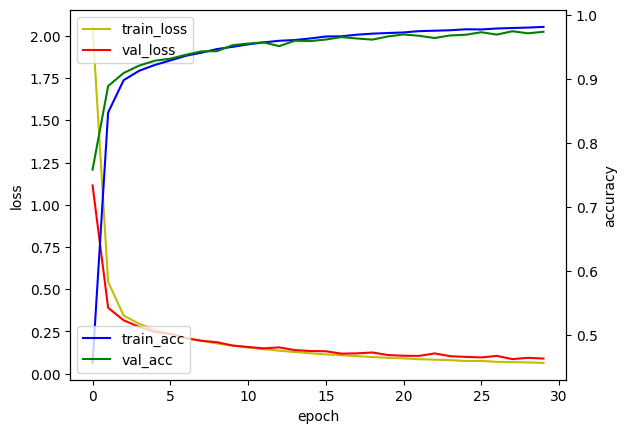

In [15]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history["loss"], "y", label="train_loss")
loss_ax.plot(hist.history["val_loss"], "r", label="val_loss")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
loss_ax.legend(loc="upper left")

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history["accuracy"], "b", label="train_acc")
acc_ax.plot(hist.history["val_accuracy"], "g", label="val_acc")
acc_ax.set_ylabel("accuracy")
acc_ax.legend(loc="lower left")

In [16]:
# CNN Evaluation

print(model.evaluate(test_norm_x_data.reshape(-1,28,28,1), 
                     test_y_data))
##        loss                 accuracy    
# [0.35500258207321167, 0.9011111259460449]   ANN
# [0.06667550653219223, 0.9899444580078125]   CNN 

563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9712 - loss: 0.0972
[0.09713757783174515, 0.9709444642066956]
